## Collaborative Filtering

The technique we're going to take a look at is Collaborative filtering.It is based on the fact that relationships exist between products and people's interests. Many recommendation systems use collaborative filtering to find these relationships and to give an accurate recommendation of a product that the user might like or be interested in.


### Item Based Collaborative Filtering

Item-item collaborative filtering, or item-based, or item-to-item, is a form of collaborative filtering for recommender systems based on the similarity between items calculated using people's ratings of those items.

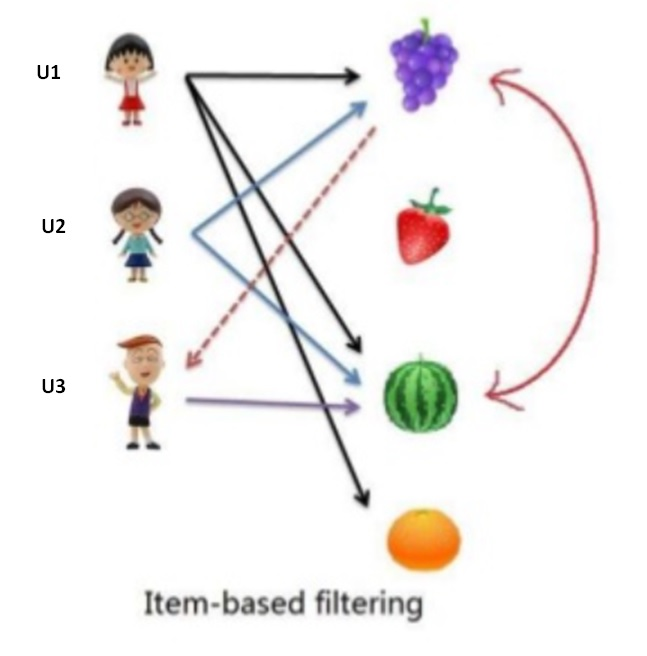

### Dataset

This data set consists of:
	* 100,000 ratings (1-5) from 943 users on 1682 movies. 
	* Each user has rated at least 20 movies. 

## Preprocessing

In [1]:
import pandas as pd
from scipy import sparse
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error
import math

In [2]:
ratings = pd.read_csv(r'C:\Users\P Sai Deekshith\Recommender Systems\ml-100k\ratings.csv')
movies = pd.read_csv(r'C:\Users\P Sai Deekshith\Recommender Systems\ml-100k\movies.csv')
ratings = pd.merge(movies,ratings).drop(['genres','timestamp'],axis=1)
print(ratings.shape)
ratings.head()

(100836, 4)


,movieId,title,userId,rating
0,1,Toy Story (1995),1,4.0
1,1,Toy Story (1995),5,4.0
2,1,Toy Story (1995),7,4.5
3,1,Toy Story (1995),15,2.5
4,1,Toy Story (1995),17,4.5


In [3]:
userRatings = ratings.pivot_table(index=['userId'],columns=['title'],values='rating')
userRatings.head()
print("Before: ",userRatings.shape)
userRatings = userRatings.dropna(thresh=10, axis=1).fillna(0,axis=1)
userRatings.fillna(0, inplace=True)
userRatings
# print("After: ",userRatings.shape)

Before:  (610, 9719)


title,"'burbs, The (1989)",(500) Days of Summer (2009),10 Cloverfield Lane (2016),10 Things I Hate About You (1999),"10,000 BC (2008)",101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),12 Angry Men (1957),12 Years a Slave (2013),127 Hours (2010),...,Zack and Miri Make a Porno (2008),Zero Dark Thirty (2012),Zero Effect (1998),Zodiac (2007),Zombieland (2009),Zoolander (2001),Zootopia (2016),eXistenZ (1999),xXx (2002),¡Three Amigos! (1986)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,4.5,3.5,0.0


### Pearson Correlation

It is used to find similar Items.

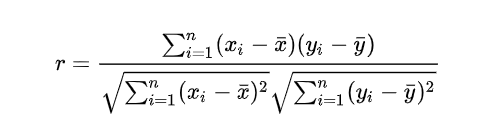

The values given by the formula vary from r = -1 to r = 1, where 1 forms a direct correlation between the two entities (it means a perfect positive correlation) and -1 forms a perfect negative correlation. 


In our case, a 1 means that the two items are very similar while a -1 means the opposite.


In [4]:
corrMatrix = userRatings.corr(method='pearson')
corrMatrix.head(100)

title,"'burbs, The (1989)",(500) Days of Summer (2009),10 Cloverfield Lane (2016),10 Things I Hate About You (1999),"10,000 BC (2008)",101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),12 Angry Men (1957),12 Years a Slave (2013),127 Hours (2010),...,Zack and Miri Make a Porno (2008),Zero Dark Thirty (2012),Zero Effect (1998),Zodiac (2007),Zombieland (2009),Zoolander (2001),Zootopia (2016),eXistenZ (1999),xXx (2002),¡Three Amigos! (1986)
title,,,,,,,,,,,,,,,,,,,,,
"'burbs, The (1989)",1.000000,0.063117,-0.023768,0.143482,0.011998,0.087931,0.224052,0.034223,0.009277,0.008331,...,0.017477,0.032470,0.134701,0.153158,0.101301,0.049897,0.003233,0.187953,0.062174,0.353194
(500) Days of Summer (2009),0.063117,1.000000,0.142471,0.273989,0.193960,0.148903,0.142141,0.159756,0.135486,0.200135,...,0.374515,0.178655,0.068407,0.414585,0.355723,0.252226,0.216007,0.053614,0.241092,0.125905
10 Cloverfield Lane (2016),-0.023768,0.142471,1.000000,-0.005799,0.112396,0.006139,-0.016835,0.031704,-0.024275,0.272943,...,0.242663,0.099059,-0.023477,0.272347,0.241751,0.195054,0.319371,0.177846,0.096638,0.002733
10 Things I Hate About You (1999),0.143482,0.273989,-0.005799,1.000000,0.244670,0.223481,0.211473,0.011784,0.091964,0.043383,...,0.243118,0.104858,0.132460,0.091853,0.158637,0.281934,0.050031,0.121029,0.130813,0.110612
"10,000 BC (2008)",0.011998,0.193960,0.112396,0.244670,1.000000,0.234459,0.119132,0.059187,-0.025882,0.089328,...,0.260261,0.087592,0.094913,0.184521,0.242299,0.240231,0.094773,0.088045,0.203002,0.083518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Almost Famous (2000),0.099554,0.209549,0.032088,0.296727,0.134434,0.118628,0.242958,0.079158,0.005092,0.051279,...,0.244619,0.085395,0.072505,0.221259,0.126008,0.362571,0.011577,0.208008,0.186599,0.147413
Along Came Polly (2004),0.027287,0.282426,0.113213,0.193085,0.162678,0.180259,0.112928,0.121704,0.125792,0.124032,...,0.173133,0.160430,0.029076,0.189165,0.166278,0.309183,0.078468,-0.036498,0.231566,0.025928
Along Came a Spider (2001),0.064762,-0.003205,0.016372,0.085365,-0.018241,0.080388,0.094016,-0.016678,0.079375,-0.028052,...,0.115347,0.093774,0.085286,0.150757,0.052144,0.174489,0.014189,0.025327,0.233244,0.043581


In [5]:
def get_similar(movie_name,rating):
    similar_ratings = corrMatrix[movie_name]*(rating-2.5)
    similar_ratings = similar_ratings.sort_values(ascending=False)
    #print(type(similar_ratings))
    return similar_ratings

In [6]:
romantic_lover = [("(500) Days of Summer (2009)",5),("Alice in Wonderland (2010)",3),("Aliens (1986)",1),("2001: A Space Odyssey (1968)",2)]
similar_movies = pd.DataFrame()
for movie,rating in romantic_lover:
    similar_movies = similar_movies.append(get_similar(movie,rating),ignore_index = True)

similar_movies.head(10)

,"'burbs, The (1989)",(500) Days of Summer (2009),10 Cloverfield Lane (2016),10 Things I Hate About You (1999),"10,000 BC (2008)",101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),12 Angry Men (1957),12 Years a Slave (2013),127 Hours (2010),...,Zack and Miri Make a Porno (2008),Zero Dark Thirty (2012),Zero Effect (1998),Zodiac (2007),Zombieland (2009),Zoolander (2001),Zootopia (2016),eXistenZ (1999),xXx (2002),¡Three Amigos! (1986)
0,0.157792,2.500000,0.356179,0.684973,0.484900,0.372257,0.355353,0.399389,0.338715,0.500338,...,0.936288,0.446637,0.171018,1.036463,0.889309,0.630565,0.540017,0.134034,0.602730,0.314763
1,-0.016276,0.203998,0.126834,0.113241,0.092218,0.085790,0.072825,0.097794,0.083822,0.084897,...,0.159907,0.085502,0.011564,0.176888,0.168302,0.121710,0.072590,0.025695,0.081764,0.027540
2,-0.304722,-0.062634,-0.214700,-0.118754,-0.037059,-0.063992,-0.170195,-0.280090,-0.016283,-0.102493,...,-0.147339,-0.162387,-0.368712,-0.281119,-0.263686,-0.228562,-0.144292,-0.410899,-0.242935,-0.238410
3,-0.102988,-0.056808,-0.049655,-0.042987,-0.021729,-0.055422,-0.051115,-0.097954,-0.061595,-0.070398,...,-0.075325,-0.048607,-0.128795,-0.175166,-0.098088,-0.074205,-0.049626,-0.153017,-0.082048,-0.091432


In [7]:
similar_movies.sum().sort_values(ascending=False).head(20)

(500) Days of Summer (2009)                      2.584556
Alice in Wonderland (2010)                       1.395229
Silver Linings Playbook (2012)                   1.254800
Yes Man (2008)                                   1.116264
Adventureland (2009)                             1.112235
Marley & Me (2008)                               1.108381
About Time (2013)                                1.102192
Crazy, Stupid, Love. (2011)                      1.088757
50/50 (2011)                                     1.086517
Help, The (2011)                                 1.075963
Up in the Air (2009)                             1.053037
Holiday, The (2006)                              1.034470
Friends with Benefits (2011)                     1.030875
Notebook, The (2004)                             1.025880
Easy A (2010)                                    1.015771
Secret Life of Walter Mitty, The (2013)          0.997979
Perks of Being a Wallflower, The (2012)          0.967425
Toy Story 3 (2

In [8]:
action_lover = [("Amazing Spider-Man, The (2012)",5),("Mission: Impossible III (2006)",4),("Toy Story 3 (2010)",2),("2 Fast 2 Furious (Fast and the Furious 2, The) (2003)",4)]
similar_movies = pd.DataFrame()
for movie,rating in action_lover:
    similar_movies = similar_movies.append(get_similar(movie,rating),ignore_index = True)

similar_movies.head(10)
similar_movies.sum().sort_values(ascending=False).head(20)

Amazing Spider-Man, The (2012)                           3.233134
Mission: Impossible III (2006)                           2.874798
2 Fast 2 Furious (Fast and the Furious 2, The) (2003)    2.701477
Over the Hedge (2006)                                    2.229721
Crank (2006)                                             2.176259
Mission: Impossible - Ghost Protocol (2011)              2.159666
Hancock (2008)                                           2.156098
The Amazing Spider-Man 2 (2014)                          2.153677
Hellboy (2004)                                           2.137518
Snakes on a Plane (2006)                                 2.137396
Jumper (2008)                                            2.129716
Chronicles of Riddick, The (2004)                        2.121689
Tron: Legacy (2010)                                      2.111843
Fantastic Four (2005)                                    2.083022
X-Men: The Last Stand (2006)                             2.077530
Wreck-It R

# Evalution
We use RMSE(Root Mean Square Error) to evaluate the recommendations.


In [9]:
true_ratings = ratings.groupby(ratings['title']).mean()
true_ratings.drop('userId', axis=1, inplace=True)
true_ratings.head()

,movieId,rating
title,,
'71 (2014),117867.0,4.0
'Hellboy': The Seeds of Creation (2004),97757.0,4.0
'Round Midnight (1986),26564.0,3.5
'Salem's Lot (2004),27751.0,5.0
'Til There Was You (1997),779.0,4.0


In [10]:
last = pd.DataFrame(similar_movies.sum().sort_values(ascending=False).head(20))

last.reset_index(level=0, inplace=True)
last.columns = ['title','predicted_rating']
last

,title,predicted_rating
0,"Amazing Spider-Man, The (2012)",3.233134
1,Mission: Impossible III (2006),2.874798
2,"2 Fast 2 Furious (Fast and the Furious 2, The)...",2.701477
3,Over the Hedge (2006),2.229721
4,Crank (2006),2.176259
5,Mission: Impossible - Ghost Protocol (2011),2.159666
6,Hancock (2008),2.156098
7,The Amazing Spider-Man 2 (2014),2.153677
8,Hellboy (2004),2.137518
9,Snakes on a Plane (2006),2.137396


In [11]:
true_ratings

,movieId,rating
title,,
'71 (2014),117867.0,4.000000
'Hellboy': The Seeds of Creation (2004),97757.0,4.000000
'Round Midnight (1986),26564.0,3.500000
'Salem's Lot (2004),27751.0,5.000000
'Til There Was You (1997),779.0,4.000000
...,...,...
eXistenZ (1999),2600.0,3.863636
xXx (2002),5507.0,2.770833
xXx: State of the Union (2005),33158.0,2.000000


In [12]:
final = pd.merge(last,true_ratings,on="title" ,how="inner")
final

,title,predicted_rating,movieId,rating
0,"Amazing Spider-Man, The (2012)",3.233134,95510.0,3.250000
1,Mission: Impossible III (2006),2.874798,45186.0,3.589286
2,"2 Fast 2 Furious (Fast and the Furious 2, The)...",2.701477,6383.0,2.605263
3,Over the Hedge (2006),2.229721,45431.0,3.428571
4,Crank (2006),2.176259,47200.0,3.428571
5,Mission: Impossible - Ghost Protocol (2011),2.159666,91630.0,3.659091
6,Hancock (2008),2.156098,60074.0,3.034483
7,The Amazing Spider-Man 2 (2014),2.153677,110553.0,2.636364
8,Hellboy (2004),2.137518,7373.0,3.378049
9,Snakes on a Plane (2006),2.137396,46965.0,2.642857


In [14]:
def rmseItemBased():
    rmse = math.sqrt(mean_squared_error(final['predicted_rating'], final['rating']))
    print("The RMSE value is : " + str(rmse))

In [15]:
rmseItemBased()

The RMSE value is : 1.0687923012602283
